# PRAKTIKUM 2

**Import Library**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

**Membuat kembali fungsi plotting**

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Membuat data dummy non linier**

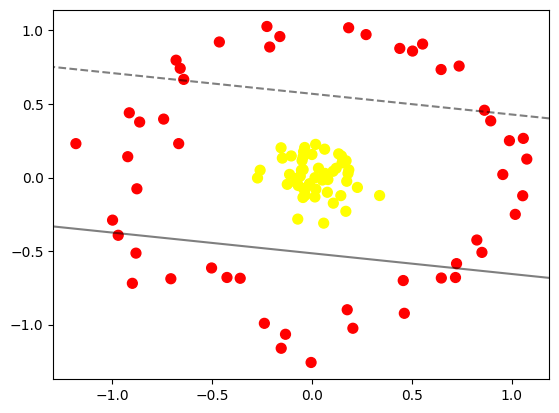

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

**Plot visualisasi diubah menjadi model 3D**

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.54257696e-01, -1.16033563e+00],
       [-3.65545884e-02,  2.03990213e-01],
       [ 7.18535301e-01, -6.79540585e-01],
       [ 6.46504532e-01,  7.33747157e-01],
       [ 5.85180757e-02, -3.10263711e-01],
       [ 1.05517146e+00, -1.23912899e-01],
       [-1.18245641e+00,  2.30169999e-01],
       [ 5.53839492e-01,  9.06813413e-01],
       [-4.58399413e-03, -1.25689362e+00],
       [-8.99661568e-01, -7.19023276e-01],
       [ 6.48861168e-02,  2.77918044e-02],
       [-8.76990129e-01, -7.66794348e-02],
       [-4.96576853e-02,  1.15554155e-01],
       [-1.61025667e-01,  9.57823910e-01],
       [ 3.38559339e-01, -1.22549014e-01],
       [-5.87180343e-02,  9.27449049e-03],
       [ 5.16728194e-02, -1.71706082e-02],
       [ 6.33209585e-02,  1.92480093e-01],
       [-9.22766459e-01,  1.41422793e-01],
       [-1.23960544e-01, -4.62946924e-02],
       [-9.15033486e-01,  4.39635856e-01],
       [ 8.50989597e-01, -5.08909752e-01],
       [ 1.06677620e-01, -1.74486369e-01],
       [-1.48600979e-01,  1.31648985e-01],
       [ 1.33647649e-01,  1.60650724e-01],
       [ 8.94989369e-01,  3.84935389e-01],
       [-1.04089050e-01,  1.46542395e-01],
       [-1.32702191e-01, -1.06533884e+00],
       [-2.25779314e-01,  1.02622487e+00],
       [ 9.88752738e-01,  2.50222966e-01],
       [-4.17448796e-02, -7.77035912e-02],
       [-4.44890502e-02,  5.33919876e-02],
       [-3.20006192e-04,  1.56194089e-01],
       [-2.72836558e-01, -3.03124666e-03],
       [-8.63149333e-01,  3.76893679e-01],
       [-3.59574972e-01, -6.84703018e-01],
       [ 9.55484097e-01,  2.03015195e-02],
       [-1.55034995e-01,  2.01903538e-01],
       [ 1.44241515e-01, -1.23202921e-01],
       [ 7.95731217e-02, -1.36559099e-02],
       [ 2.04617276e-01, -1.02432857e+00],
       [-6.60092911e-01,  7.41861108e-01],
       [ 6.47636004e-01, -6.82994881e-01],
       [ 1.76322472e-01, -8.98561447e-01],
       [ 1.05352926e-01,  4.22592006e-02],
       [ 8.63601798e-01,  4.56982560e-01],
       [ 1.73919064e-01, -2.54691728e-02],
       [ 4.56856218e-01, -7.00156395e-01],
       [-7.43011435e-01,  3.96854264e-01],
       [ 7.68160193e-02, -1.00399727e-01],
       [-6.87891517e-02, -5.44286797e-02],
       [-4.44650708e-02,  1.40870443e-01],
       [-1.12343462e-01,  2.10536682e-02],
       [ 1.83535510e-01,  1.01753978e+00],
       [ 8.25449165e-01, -4.24763949e-01],
       [ 2.27284697e-01, -6.73443760e-02],
       [-4.52938573e-02, -1.35777732e-01],
       [ 1.69465949e-01, -2.29696891e-01],
       [-7.13112994e-02, -2.82651264e-01],
       [-2.59868267e-01,  4.94473303e-02],
       [-3.37787798e-02, -1.20161234e-01],
       [ 3.23812969e-02,  6.31185794e-02],
       [-6.67636251e-01,  2.30229421e-01],
       [ 1.05817790e+00,  2.65804105e-01],
       [ 1.21132824e-01,  6.28888037e-02],
       [ 1.70559068e-01,  1.13616472e-01],
       [ 1.50768164e-01,  9.96837165e-02],
       [-5.28510167e-02,  4.99342311e-02],
       [-1.26184838e-02, -4.21983692e-02],
       [ 6.11858135e-02,  2.44169761e-02],
       [-2.11790419e-01,  8.86737797e-01],
       [-9.70505194e-01, -3.92596949e-01],
       [-6.94440003e-02, -2.97107700e-03],
       [ 1.01792469e+00, -2.50515359e-01],
       [-6.42491287e-01,  6.66721817e-01],
       [ 4.62336789e-01, -9.22808059e-01],
       [ 1.07568643e+00,  1.25147336e-01],
       [-4.64043635e-01,  9.20864820e-01],
       [-5.02966741e-01, -6.14721605e-01],
       [ 5.03463976e-01,  8.59119627e-01],
       [ 1.84331762e-01,  5.18152300e-02],
       [ 1.81220432e-02,  2.25135180e-01],
       [ 1.45663851e-02, -1.32228480e-01],
       [-4.25874433e-01, -6.79248123e-01],
       [ 1.80283861e-01,  2.76496624e-02],
       [ 2.70694908e-01,  9.71104227e-01],
       [-2.38594789e-01, -9.90907625e-01],
       [-9.98791299e-01, -2.89677290e-01],
       [ 4.39628418e-01,  8.77074468e-01],
       [ 7.23853198e-01, -5.85200044e-01],
       [-4.21074462e-02,  1.75620303e-01],
       [ 1.92572355e-02, -7.93558477e-02

**Fitting Model**

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

**Plot hasil decision boundaries dari kernel RBF**

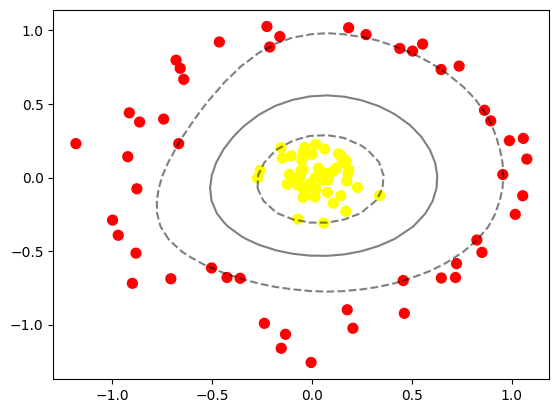

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')